<a href="https://colab.research.google.com/github/vroco11/Curso_Herramientas_An-lisis/blob/main/Tarea3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ejemplo de procesamiento del lenguaje

##Link de los archivos [aqui](https://drive.google.com/drive/folders/15ksnKTfcSsisz1PkTiFxlDeeUCKed4J6?usp=sharing)

## En este ejercicio trabajaremos procesando una base de datos n o estructurada proveniente de twiiter.
##Existen 5 archivos csv que contienen tuits correspondientes a los siguientes #hashtag:


1.   apruebo.
2.   dolar.
3.   incertidumbre
4.   inflacion 
5.   rechazo

##Debe considerar que son tuits recientes. Estos tuits puede haber sido escritos por cualquier usuario y hacer relacion a cualquier conceto y en cualquier contexto. El unico requisito es que el tuit contenga el hashtag.





##Configurar ***`drive`***.


1.   Pedir acceso.
2.   Crear acceso directo en ***`drive`*** para poder leer la carpeta MK que contiene los tuits.




In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##Crear preambulo para procesar texto

In [ ]:
# Entorno y gestion de paquetes
!pip install spacy --quiet
#!pip spacy download es_core_news_sm --quiet
!python -m spacy download es_core_news_md --quiet
!python -m spacy download es_core_news_sm --quiet

2022-07-26 01:26:07.497640: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
     |████████████████████████████████| 42.3 MB 1.4 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
2022-07-26 01:26:20.065152: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
     |████████████████████████████████| 12.9 MB 8.3 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [ ]:
# Carga librerias
import warnings
warnings.filterwarnings('ignore')
import spacy
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import string
remove_punct_map = dict.fromkeys(map(ord, string.punctuation))
from nltk import word_tokenize
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
esp_stop = stopwords.words('spanish')
nlp = spacy.load("es_core_news_sm")

##Manejar los directorios para entrar a la carpeta

In [ ]:
cd /content/drive/MyDrive/MK/datatuits

/content/drive/MyDrive/MK/datatuits


##Exploremos un poco la carpeta datatuits

In [ ]:
ls

apruebo.csv  incertidumbre_chile.csv  inflacion.csv
dolar.csv    incertidumbre.csv        rechazo.csv


##Cargar la base de datos 

In [ ]:
df = pd.read_csv('inflacion.csv', sep ='\t')

##Informacion presente en el dataframe. Nombre de columnas.

In [ ]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

##Numero de columnas.

In [ ]:
len(df.columns)

36

##Numero de observaciones

In [ ]:
len(df)

3316

##Seleccionamos las columnas relevantes para este caso.

In [ ]:
df=df[['date', 'tweet']]
df.head(20)

,date,tweet
0,2022-07-25,"#Biden, ¿responsable? #Opinión de Arturo Balde..."
1,2022-07-25,Situaciones desesperadas requieren medidas des...
2,2022-07-25,"No nos gusta la #inflacion, porque significa d..."
3,2022-07-25,1er. Foro Monográfico del 2022!! Comenzamos el...
4,2022-07-25,No estoy seguro si TODO es más caro...oh yo so...
5,2022-07-25,IMEFOficial: 🔴 Perspectiva Económica Trimestra...
6,2022-07-25,Precios de la gasolina Julio 2022. Europa paga...
7,2022-07-25,Para abrir cuenta https://t.co/gPHIjGA1po #Bi...
8,2022-07-25,#binanceArgentina #inflacion #Batakis #nodice...
9,2022-07-25,#DolarBlue Eviten quedarse en su casa con peso...


##Otra forma de visulizar

In [ ]:
df.sample(20).tweet.tolist()

['El pan Bimbo tiene precios inalcanzables para muchos mexicanos. #inflación  https://t.co/8WV7L78zQs',
 '#INFLACION - Los aumentos en los productos básicos de alimento no páran. Ahora La Lechera a $1.200  https://t.co/8O616S3GVu',
 'Allá donde hay problemas (falta de confianza, sobre impresión, inflación, falta de crédito, falta de liquidez, crisis de solvencia….) aparece el oro como garante. No falla. Trasciende fronteras y épocas.  #oro $Gold #inflation #Inflacion',
 '📈 El aumento de la #inflación afectará a la prima de los seguros “pero menos de lo que se pudiera imaginar”, ha señalado Javier Barberá, presidente de @CGMediadores.  🔗 Lee la noticia entera aquí 👉  https://t.co/0ahFHtB2ia  https://t.co/p9RSJfJ8kN',
 '#Nacional | ANDRÉS MANUEL ASEGURÓ QUE PESE AL AUMENTO DE LA INFLACIÓN EN MÉXICO SE SITÚA POR DEBAJO DE LA DE ESTADOS UNIDOS, AUNQUE ADVIRTIÓ QUE SE MANTENDRÁ AL ALZA 💰📈 #Inflación #Aumento #Precios  Pronosticó así que para octubre o noviembre empiece a…  https://t.co/xwyO

##Pre-procesamiento (ver clase)

In [ ]:
# Limpiamos el texto
from string import digits
punctuations1 = '''!()-[]{}"#$&'*+,./;:<=>?@\^_`|"~“—”¬ø¿•º'''
df['tweet'] = df['tweet'].str.lower()
df['tweet'] = df['tweet'].replace("  ", " ")
df['tweet'] = df['tweet'].str.translate(str.maketrans('', '', string.punctuation))
df['tweet'] = df['tweet'].str.translate(str.maketrans('', '', punctuations1))
df['tweet'] = df['tweet'].str.translate(str.maketrans('', '', digits))
df['tweet'] = df['tweet'].str.strip()
df = df[df['tweet'].str.len()>2]
df= df[df['tweet'] != ""]
#df = df.reset_index()
print(df.head(10), "\n",
      "Numero de Registros", len(df))

         date                                              tweet
0  2022-07-25  biden responsable opinión de arturo balderas r...
1  2022-07-25  situaciones desesperadas requieren medidas des...
2  2022-07-25  no nos gusta la inflacion porque significa det...
3  2022-07-25  er foro monográfico del  comenzamos el miércol...
4  2022-07-25  no estoy seguro si todo es más carooh yo soy p...
5  2022-07-25  imefoficial 🔴 perspectiva económica trimestral...
6  2022-07-25  precios de la gasolina julio  europa paga el c...
7  2022-07-25  para abrir cuenta  httpstcogphijgapo binance b...
8  2022-07-25  binanceargentina inflacion  batakis nodicennad...
9  2022-07-25  dolarblue eviten quedarse en su casa con pesos... 
 Numero de Registros 3316


##Tokenizar

In [ ]:
# Token: palabras como unidad
toks = []
frases = []
for i in range(len(df)):
  # Rescata la frase escrita sobre el tema
  frase = df.iloc[i]['tweet']
  # Separa la frase por palabras
  tokens = word_tokenize(frase)
  toks.extend(tokens)

In [ ]:
# Pasamos toks a dataframe
# Muestra total las palabras
df_tokens = pd.DataFrame(toks, columns =['token'])
print("Primera 10 palabras de las frases \n",
      df_tokens.head(10))
print("Total de Palabras", len(df_tokens))

Primera 10 palabras de las frases 
          token
0        biden
1  responsable
2      opinión
3           de
4       arturo
5     balderas
6    rodríguez
7           la
8     pregunta
9           de
Total de Palabras 83509


In [ ]:
# Se eliminan las stopwords
df_tokens_clean = df_tokens[~df_tokens.token.isin(esp_stop)]
print(print("Primera 10 palabras de las frases limpias \n",
          df_tokens_clean.head(10)))
print("Total de Palabras Limpias", len(df_tokens_clean))

Primera 10 palabras de las frases limpias 
              token
0            biden
1      responsable
2          opinión
4           arturo
5         balderas
6        rodríguez
8         pregunta
10        millones
12  estadunidenses
15         difícil
None
Total de Palabras Limpias 51973


In [ ]:
# Frecuencia de palabras
tokens_count = df_tokens_clean['token'].value_counts().rename_axis('token').reset_index(name='counts')
tokens_count = tokens_count[tokens_count.counts>3]
print("Frecuencia de Palabras \n",
      tokens_count.head(10), "\n",
      "Numero de registros", len(tokens_count))

Frecuencia de Palabras 
        token  counts
0  inflación    2635
1  inflacion    1297
2    precios     431
3      julio     384
4   economía     286
5     méxico     278
6    primera     275
7   economia     255
8   quincena     250
9  argentina     250 
 Numero de registros 2413


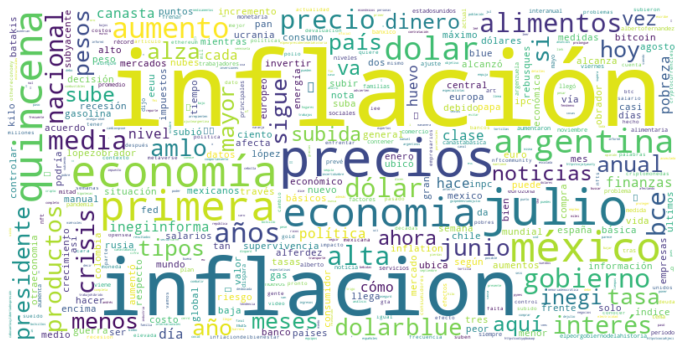

In [ ]:
# Pregunta 1. Wordcloud por token
data = dict(zip(tokens_count['token'].tolist(), tokens_count['counts'].tolist()))
wc = WordCloud(background_color='white',width=800, height=400, max_words=500).generate_from_frequencies(data)

plt.figure(figsize=(12, 12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#Tarea


1.   Cargar todos los archivos de texto (`dolar`,`incertidumbre`,`rechazo`,`apruebo`,`inflacion`) con un loop.

2.   Defina e incluya nuevas stop words.
3.   Cuente el numero de observaciones para cada archivo de texto.
4.   Calcule las palabras mas frecuentes para cada uno.
5.   Calcule la longitud media y la desviacion estandar (numero de palabras de cada tuit y desviacion estandar del numero de palabras) de los tuits por conceptos.
6.   Muestre una nube de palabras por concepto y una nube de palabras total.
7. Muestre una nube comparatoria (`Comparison Cloud`) por conceptos (pista ver [aqui](https://rpubs.com/brandonkopp/creating-word-clouds-in-r) 



